In [1]:
from voc import make_filepath_list

rootpath = "./data/VOCdevkit/VOC2012/"
tr_img, tr_anno, val_img, val_anno = make_filepath_list(rootpath)

print(tr_img[0])
print(tr_anno[0])
print(val_img[0])
print(val_anno[0])

./data/VOCdevkit/VOC2012/JPEGImages/2008_000008.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000008.xml
./data/VOCdevkit/VOC2012/JPEGImages/2008_000002.jpg
./data/VOCdevkit/VOC2012/Annotations/2008_000002.xml


In [2]:
import cv2
from voc import GetBBoxAndLabel

voc_labels = ["aeroplane", "bicycle", "bird", "boat", "bottle", "bus", "car", "cat", "chair", "cow", "diningtable", "dog", "horse", "motorbike", "person", "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

annotation = GetBBoxAndLabel(voc_labels)

index = 1
img_path = val_img[index]

img = cv2.imread(img_path)

height, width, _ = img.shape

annotation(val_anno[index], width, height)

array([[ 0.09 ,  0.02 ,  0.998,  0.664, 18.   ],
       [ 0.122,  0.378,  0.164,  0.484, 14.   ]])

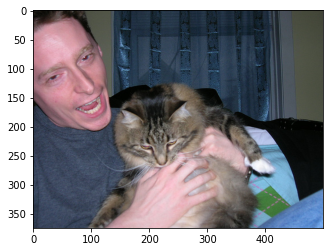

/Users/someya/work/Kaggle/ssd/augmentations.py:293: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


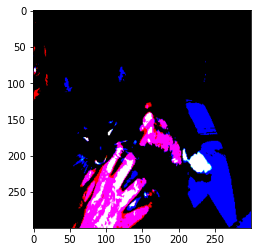

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


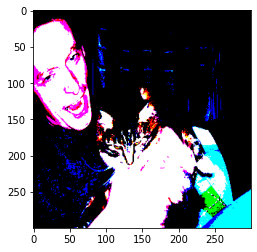

In [3]:
from voc import DataTransform

import matplotlib.pyplot as plt
%matplotlib inline

img_filepath = tr_img[19]
img = cv2.imread(img_filepath)

height, width, _ = img.shape

gbl = GetBBoxAndLabel(voc_labels)
bbox_label = gbl(tr_anno[19], width, height)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

color_mean = (104, 117, 123)
input_size = 300

transform = DataTransform(input_size, color_mean)

phase = "train"

img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

phase = "val"

img_transformed, boxes, labels = transform(
    img,
    phase,
    bbox_label[:, :4],
    bbox_label[:, 4]
)

plt.imshow(cv2.cvtColor(img_transformed, cv2.COLOR_BGR2RGB))
plt.show()

In [4]:
from voc import PreProcessVOC2012

color_mean = (104, 117, 123)
imput_size = 300

tr_data = PreProcessVOC2012(
    tr_img,
    tr_anno,
    phase="train",
    transform=DataTransform(input_size, color_mean),
    get_bbox_label=GetBBoxAndLabel(voc_labels)
)

val_data = PreProcessVOC2012(
    val_img,
    val_anno,
    phase="val",
    transform=DataTransform(input_size, color_mean),
    get_bbox_label=GetBBoxAndLabel(voc_labels)
)

batch = tr_data.__getitem__(1)
print(len(batch))
print(batch[0].shape)
print(batch[1].shape)
print(batch)

2
torch.Size([3, 300, 300])
(2, 5)
(tensor([[[  24.6750,   22.0500,   19.7500,  ...,  -49.3750,  -52.0500,
           -54.6750],
         [  24.0607,   21.1628,   20.6600,  ...,  -52.1050,  -53.8700,
           -56.4950],
         [  26.5500,   21.9675,   19.9000,  ...,  -48.7625,  -54.0288,
           -55.2513],
         ...,
         [ -82.9475,  -73.5462,  -70.8250,  ...,  -98.2000,  -95.2325,
           -94.1525],
         [ -82.6185,  -75.3150,  -73.3412,  ..., -100.3000,  -96.6285,
           -99.0622],
         [ -82.3000,  -76.2250,  -73.0000,  ...,  -95.7500,  -93.1250,
          -102.7250]],

        [[ -34.4141,  -36.1921,  -38.4704,  ...,  -13.2243,  -15.8993,
           -18.5243],
         [ -35.0284,  -37.0794,  -37.5604,  ...,  -15.9543,  -17.7193,
           -20.3443],
         [ -32.4276,  -36.9918,  -39.0588,  ...,  -15.0502,  -20.3164,
           -21.5389],
         ...,
         [-110.6902, -105.0466, -106.6893,  ..., -104.2000, -101.2325,
           -99.4775],
    

In [5]:
import torch.utils.data as data
from voc import multiobject_collate_fn

batch_size = 4

tr_batch = data.DataLoader(
    tr_data,
    batch_size=batch_size,
    shuffle=True,
    collate_fn=multiobject_collate_fn
)

val_batch = data.DataLoader(
    val_data,
    batch_size=batch_size,
    shuffle=False,
    collate_fn=multiobject_collate_fn
)

dataloaders_dict = {"train" : tr_batch, "val" : val_batch}

batch_iterator = iter(dataloaders_dict["train"])
images, targets = next(batch_iterator)

print(images.size())
print(len(targets))

torch.Size([4, 3, 300, 300])
4
